In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [206]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("ntt.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  361 non-null    datetime64[ns]
 1   Tn       356 non-null    float64       
 2   Tx       355 non-null    float64       
 3   Tavg     354 non-null    float64       
 4   RH_avg   354 non-null    float64       
 5   RR       336 non-null    float64       
 6   ss       356 non-null    float64       
 7   ff_x     356 non-null    float64       
 8   ddd_x    356 non-null    float64       
 9   ff_avg   356 non-null    float64       
 10  ddd_car  356 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.1+ KB


<ipython-input-206-c382af919d94>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [207]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.2,31.8,10.4,28.9
1,2023-02-01,27.2,32.3,0.0,29.8
2,2023-03-01,27.4,30.0,8888.0,28.7
3,2023-04-01,24.6,31.4,28.2,28.5
4,2023-05-01,27.0,31.8,2.1,29.5
...,...,...,...,...,...
356,2023-12-12,26.2,32.6,6.8,28.7
357,2023-12-13,25.4,33.0,4.0,29.1
358,2023-12-14,24.8,33.0,0.0,29.6
359,2023-12-15,26.9,32.6,0.0,29.6


In [208]:
# cek duplikat
df1.duplicated().sum()

11

In [209]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [210]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [211]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.2,31.8,10.4,28.9
1,31,31,2023-01-02,25.0,32.0,14.4,28.7
2,59,60,2023-01-03,25.7,30.6,1.9,28.3
3,90,92,2023-01-04,24.4,32.4,23.9,28.5
4,120,123,2023-01-05,23.5,32.2,0.0,28.4
...,...,...,...,...,...,...,...
345,345,356,2023-12-12,26.2,32.6,6.8,28.7
346,346,357,2023-12-13,25.4,33.0,4.0,29.1
347,347,358,2023-12-14,24.8,33.0,0.0,29.6
348,348,359,2023-12-15,26.9,32.6,0.0,29.6


In [212]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          5
Tx          6
RR         25
Tavg        7
dtype: int64

In [213]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       5
dtype: int64

In [214]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

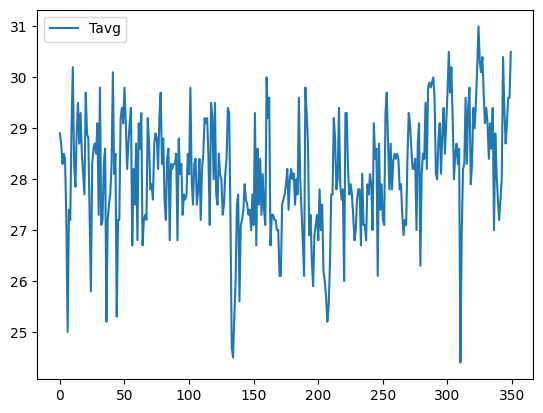

In [215]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

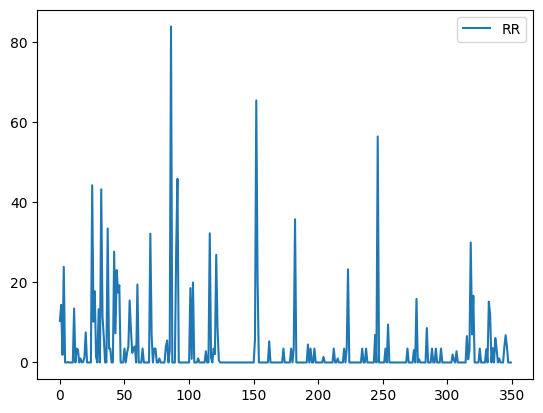

In [216]:
#plotting tavg
df1[['RR']].plot()

In [217]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.2,31.8,10.4,28.9,32.0,28.7,14.4
1,31,31,2023-01-02,25.0,32.0,14.4,28.7,30.6,28.3,1.9
2,59,60,2023-01-03,25.7,30.6,1.9,28.3,32.4,28.5,23.9
3,90,92,2023-01-04,24.4,32.4,23.9,28.5,32.2,28.4,0.0
4,120,123,2023-01-05,23.5,32.2,0.0,28.4,31.4,27.2,0.0
...,...,...,...,...,...,...,...,...,...,...
345,345,356,2023-12-12,26.2,32.6,6.8,28.7,33.0,29.1,4.0
346,346,357,2023-12-13,25.4,33.0,4.0,29.1,33.0,29.6,0.0
347,347,358,2023-12-14,24.8,33.0,0.0,29.6,32.6,29.6,0.0
348,348,359,2023-12-15,26.9,32.6,0.0,29.6,33.0,30.5,0.0


In [218]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.4,28.9,28.7,14.4
1,14.4,28.7,28.3,1.9
2,1.9,28.3,28.5,23.9
3,23.9,28.5,28.4,0.0
4,0.0,28.4,27.2,0.0
...,...,...,...,...
345,6.8,28.7,29.1,4.0
346,4.0,29.1,29.6,0.0
347,0.0,29.6,29.6,0.0
348,0.0,29.6,30.5,0.0


In [219]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.4,28.9,28.7,14.4
1,14.4,28.7,28.3,1.9
2,1.9,28.3,28.5,23.9
3,23.9,28.5,28.4,0.0
4,0.0,28.4,27.2,0.0
...,...,...,...,...
344,3.8,29.4,28.7,6.8
345,6.8,28.7,29.1,4.0
346,4.0,29.1,29.6,0.0
347,0.0,29.6,29.6,0.0


In [220]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [221]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.4,28.9,28.7,14.4,0
1,14.4,28.7,28.3,1.9,1
2,1.9,28.3,28.5,23.9,2
3,23.9,28.5,28.4,0.0,3
4,0.0,28.4,27.2,0.0,4
...,...,...,...,...,...
344,3.8,29.4,28.7,6.8,344
345,6.8,28.7,29.1,4.0,345
346,4.0,29.1,29.6,0.0,346
347,0.0,29.6,29.6,0.0,347


In [222]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [223]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [224]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [225]:
X_test

,Indeks,Tavg
279,279,26.3
280,280,28.1
281,281,28.5
282,282,28.4
283,283,29.5
...,...,...
344,344,29.4
345,345,28.7
346,346,29.1
347,347,29.6


In [226]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.10815703, 27.78275313, 27.93163623, 27.89276468, 28.30450427,
       27.81502158, 28.41451582, 28.45074613, 28.41187458, 28.44810489,
       28.48433519, 28.33281086, 27.77192698, 27.72935476, 28.02844157,
       28.13977373, 27.76664449, 28.06203063, 28.24846466, 27.90918568,
       28.13317063, 28.35715558, 28.65624239, 28.35451434, 28.54094836,
       28.16411846, 27.71218669, 27.89862071, 27.97240195, 27.82087761,
       27.93220978, 26.35375015, 27.29120275, 27.7780442 , 27.81427451,
       28.30111597, 27.81163327, 28.22337287, 28.37225596, 27.65746769,
       27.80635079, 28.21809038, 28.06656605, 28.25300007, 28.51453595,
       28.81362276, 28.54944564, 28.47302316, 28.58435533, 28.32017821,
       28.09355201, 28.20488418, 28.09091077, 27.82673365, 28.08826953,
       27.89919427, 28.19828108, 27.29573817, 28.00788519, 27.70985781,
       27.51708188, 27.36555754, 27.51444064, 27.66332373, 28.5632254 ,
       28.18639549, 27.92221837, 28.07110147, 28.25753549, 28.25

In [227]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.091771198089898 1.6759670947068037


In [228]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
279,279,26.3
280,280,28.1
281,281,28.5
282,282,28.4
283,283,29.5
...,...,...
344,344,29.4
345,345,28.7
346,346,29.1
347,347,29.6


In [229]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
279,27.108157
280,27.782753
281,27.931636
282,27.892765
283,28.304504
...,...
344,28.186395
345,27.922218
346,28.071101


In [230]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-230-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.9,NaN
1,28.7,NaN
2,28.3,NaN
3,28.5,NaN
4,28.4,NaN
...,...,...
344,29.4,28.186395
345,28.7,27.922218
346,29.1,28.071101
347,29.6,28.257535


<Axes: >

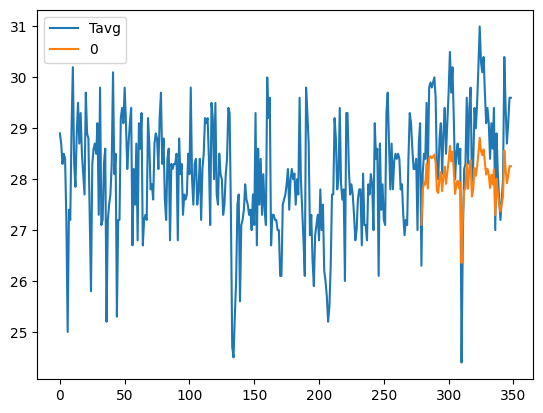

In [231]:
kan.plot()

In [232]:
new_data = [[350, 29.6],[351,29.6],[352,29.6],[353,29.6],[354,29.6],[355,29.6],[356,29.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.25357363, 28.25225301, 28.25093239, 28.24961177, 28.24829115,
       28.24697052, 28.2456499 ])

In [234]:
kan.to_json('prediksi ntt')